# 4.9 - Intro to Data Visualization with Python Part 1

## This scripts contain the following points:
### 1. Importing 
### 2. Data Wrangling
### 3. Data Quality/Consistency Checks
### 4. Merge Dataset
### 5. Exporting

# Importing

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to main folder
path = r'C:\Users\nguye\OneDrive\02-2022 Instacart Basket Analysis'

In [3]:
# Import dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

# Data Wrangling

In [4]:
df.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [5]:
df.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [6]:
df.shape

(206209, 10)

### According to the project brief, customer data on region, age, family status and income are needed to conduct an analysis. First name, surnam, and date joined is not needed and therefore will be removed from the dataset. 

In [7]:
# Drop first, surnam, date_joined columns from the dataframe
df = df.drop(columns = ['First Name', 'Surnam', 'date_joined'])

In [8]:
# Rename columns
df.rename(columns = {'Gender' : 'gender', 'STATE' : 'state', 'Age' : 'age', 'n_dependants' : 'number_of_dependants', 'fam_status' : 'family_status'}, inplace = True)

In [9]:
df.head()

,user_id,gender,state,age,number_of_dependants,family_status,income
0,26711,Female,Missouri,48,3,married,165665
1,33890,Female,New Mexico,36,0,single,59285
2,65803,Male,Idaho,35,2,married,99568
3,125935,Female,Iowa,40,0,single,42049
4,130797,Female,Maryland,26,1,married,40374


# Data Quality / Consistency Checks

In [10]:
# Check for mixed-type data
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

In [11]:
# Check for missing values
df.isnull().sum()

user_id                 0
gender                  0
state                   0
age                     0
number_of_dependants    0
family_status           0
income                  0
dtype: int64

In [12]:
# Check for duplicates
df_dups = df[df.duplicated()]

In [13]:
df_dups

,user_id,gender,state,age,number_of_dependants,family_status,income


### No mixed-type data, missing values, or duplicates were found in the dataset. 
### One thing to note is that the maximum value of the income is possibly an outlier and will be looked into.

In [14]:
df['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='income'>

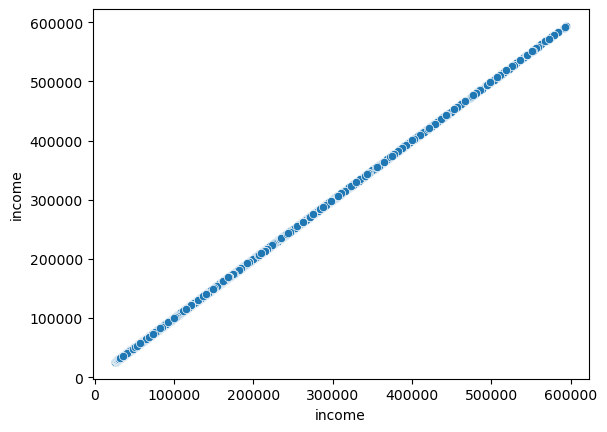

In [15]:
# Create a scatterplot of 'income' column to look for outliers
sns.scatterplot(x = 'income', y = 'income', data = df)

### The scatterplot shows that the income is normallly distributed throughout the pricing range and therefore there are no outliers present. 

# Merge dataset

In [16]:
# Import dataset to merge
df_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_corrected.pkl'))

In [17]:
# Look for key to combine
df_2.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
traffic_status              object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spender_flag                object
med_freq                   float64
frequency_flag              object
dtype: object

In [18]:
df.dtypes

user_id                  int64
gender                  object
state                   object
age                      int64
number_of_dependants     int64
family_status           object
income                   int64
dtype: object

In [19]:
# Check size of both dataframes
df.shape

(206209, 7)

In [20]:
df_2.shape

(32404859, 24)

In [21]:
# Merge dataframe with combined key of 'user_id'
df_merged = df_2.merge(df, on = 'user_id', indicator = 'exists')

In [22]:
df_merged.shape

(32404859, 31)

# Exporting

In [23]:
# Export to pickle
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))